In [1]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Grafik ayarları
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# CSV dosyalarını oku
calisanlar = pd.read_csv('Calisanlar.csv')
departmanlar = pd.read_csv('Departmanlar.csv')
bordro = pd.read_csv('Bordro.csv')
izinler = pd.read_csv('Izinler.csv')

# İlk 5 satırı göster
print("CALISANLAR:")
print(calisanlar.head())
print("\nDEPARTMANLAR:")
print(departmanlar.head())

CALISANLAR:
   calisan_id      ad   soyad  departman_id     pozisyon ise_giris_tarihi  \
0           1   Ahmet  Yılmaz             1        Uzman       2019-03-15   
1           2    Ayşe    Kaya             2        Müdür       2018-01-20   
2           3  Mehmet   Demir             1        Uzman       2020-06-10   
3           4   Fatma   Çelik             3      Analist       2021-02-14   
4           5     Ali   Şahin             2  Koordinatör       2019-11-05   

    maas  
0  45000  
1  75000  
2  42000  
3  38000  
4  52000  

DEPARTMANLAR:
   departman_id        departman_adi  yonetici_id  lokasyon   butce
0             1     İnsan Kaynakları           25  İstanbul  500000
1             2               Finans            2  İstanbul  750000
2             3  Bilgi Teknolojileri           13    Ankara  650000
3             4            Pazarlama           17  İstanbul  600000
4             5            Operasyon            9     İzmir  550000


In [2]:
# Tarih sütunlarını datetime formatına çevir
calisanlar['ise_giris_tarihi'] = pd.to_datetime(calisanlar['ise_giris_tarihi'])
izinler['baslangic'] = pd.to_datetime(izinler['baslangic'])
izinler['bitis'] = pd.to_datetime(izinler['bitis'])

# Kıdem hesapla (yıl cinsinden)
calisanlar['kidem_yil'] = (pd.Timestamp.now() - calisanlar['ise_giris_tarihi']).dt.days / 365.25

# Veri bilgisi
print("Toplam Çalışan:", len(calisanlar))
print("Toplam Departman:", len(departmanlar))
print("Toplam Bordro Kaydı:", len(bordro))
print("Toplam İzin Kaydı:", len(izinler))
print("\nVeri Tipleri:")
print(calisanlar.dtypes)

Toplam Çalışan: 100
Toplam Departman: 5
Toplam Bordro Kaydı: 600
Toplam İzin Kaydı: 100

Veri Tipleri:
calisan_id                   int64
ad                          object
soyad                       object
departman_id                 int64
pozisyon                    object
ise_giris_tarihi    datetime64[ns]
maas                         int64
kidem_yil                  float64
dtype: object


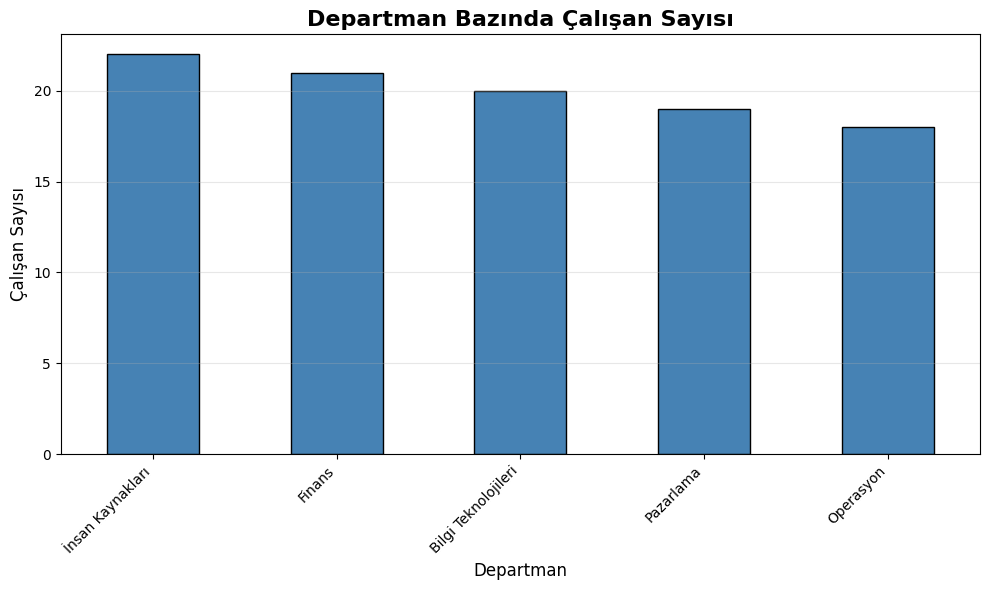

departman_adi
İnsan Kaynakları       22
Finans                 21
Bilgi Teknolojileri    20
Pazarlama              19
Operasyon              18
Name: count, dtype: int64


In [3]:
# Departman bazında çalışan sayısı
dept_merge = calisanlar.merge(departmanlar, on='departman_id')
dept_counts = dept_merge['departman_adi'].value_counts()

# Grafik oluştur
plt.figure(figsize=(10, 6))
dept_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Departman Bazında Çalışan Sayısı', fontsize=16, fontweight='bold')
plt.xlabel('Departman', fontsize=12)
plt.ylabel('Çalışan Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(dept_counts)

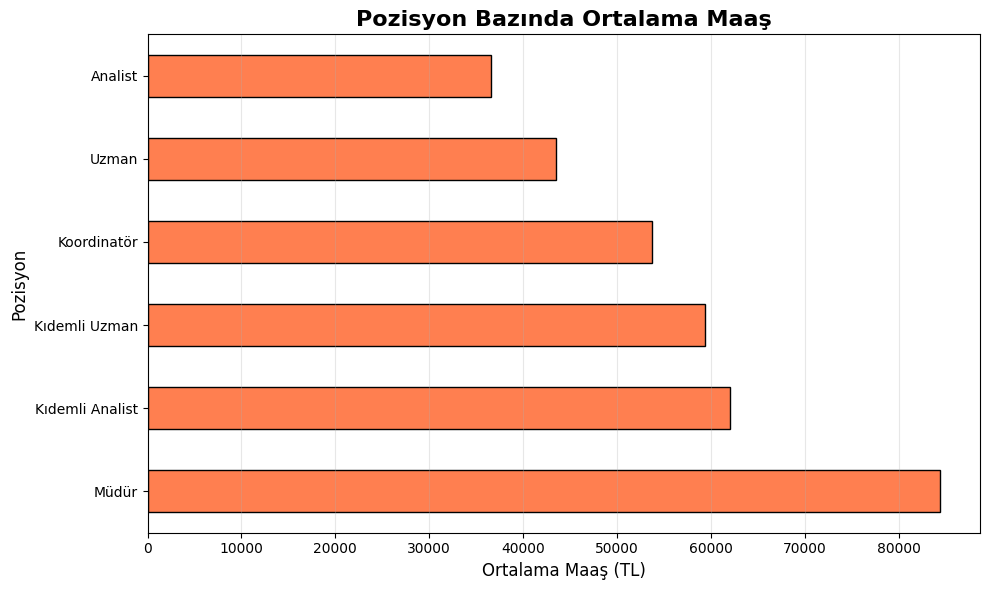

                         mean  count
pozisyon                            
Müdür            84454.545455     11
Kıdemli Analist  62000.000000      1
Kıdemli Uzman    59357.142857     14
Koordinatör      53714.285714     14
Uzman            43487.804878     41
Analist          36578.947368     19


In [4]:
# Pozisyon bazında ortalama maaş
pozisyon_maas = calisanlar.groupby('pozisyon')['maas'].agg(['mean', 'count']).sort_values('mean', ascending=False)

plt.figure(figsize=(10, 6))
pozisyon_maas['mean'].plot(kind='barh', color='coral', edgecolor='black')
plt.title('Pozisyon Bazında Ortalama Maaş', fontsize=16, fontweight='bold')
plt.xlabel('Ortalama Maaş (TL)', fontsize=12)
plt.ylabel('Pozisyon', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(pozisyon_maas)

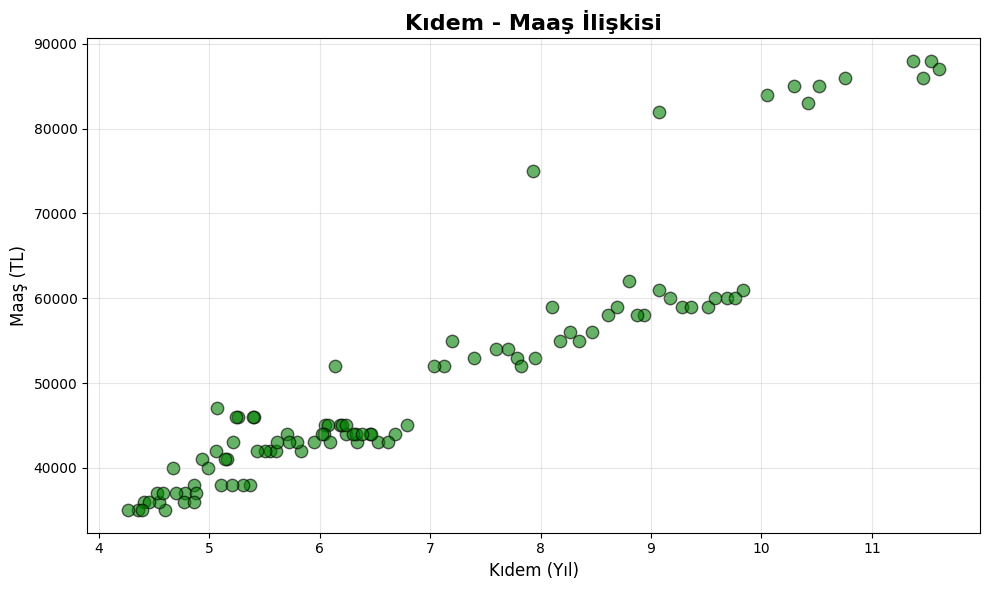

Kıdem İstatistikleri:
count    100.000000
mean       6.876605
std        1.999968
min        4.262834
25%        5.238877
50%        6.242300
75%        8.377139
max       11.611225
Name: kidem_yil, dtype: float64


In [5]:
# Kıdem vs Maaş ilişkisi (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(calisanlar['kidem_yil'], calisanlar['maas'], alpha=0.6, c='green', edgecolors='black', s=80)
plt.title('Kıdem - Maaş İlişkisi', fontsize=16, fontweight='bold')
plt.xlabel('Kıdem (Yıl)', fontsize=12)
plt.ylabel('Maaş (TL)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# İstatistikler
print("Kıdem İstatistikleri:")
print(calisanlar['kidem_yil'].describe())

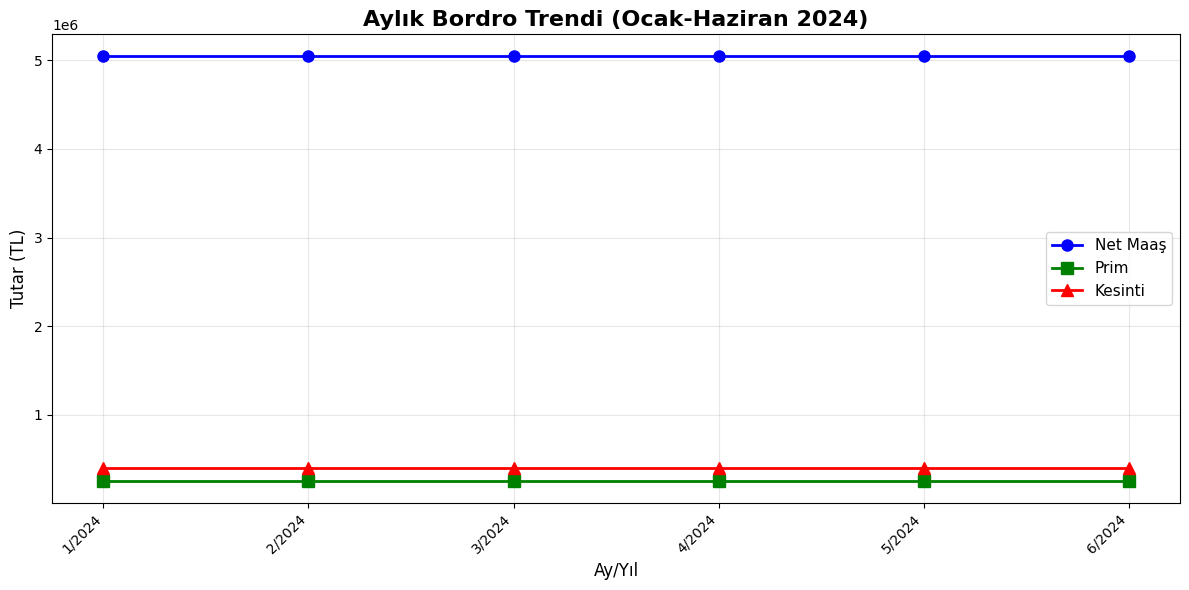

    yil  ay  net_maas    prim  kesinti  ay_yil
0  2024   1   5052000  252600   404160  1/2024
1  2024   2   5052000  252600   404160  2/2024
2  2024   3   5052000  252600   404160  3/2024
3  2024   4   5052000  252600   404160  4/2024
4  2024   5   5052000  252600   404160  5/2024
5  2024   6   5052000  252600   404160  6/2024


In [6]:
# Aylık bordro toplamları
aylik_bordro = bordro.groupby(['yil', 'ay']).agg({
    'net_maas': 'sum',
    'prim': 'sum',
    'kesinti': 'sum'
}).reset_index()

# Ay-Yıl birleştir
aylik_bordro['ay_yil'] = aylik_bordro['ay'].astype(str) + '/' + aylik_bordro['yil'].astype(str)

# Grafik
plt.figure(figsize=(12, 6))
plt.plot(aylik_bordro['ay_yil'], aylik_bordro['net_maas'], marker='o', linewidth=2, markersize=8, label='Net Maaş', color='blue')
plt.plot(aylik_bordro['ay_yil'], aylik_bordro['prim'], marker='s', linewidth=2, markersize=8, label='Prim', color='green')
plt.plot(aylik_bordro['ay_yil'], aylik_bordro['kesinti'], marker='^', linewidth=2, markersize=8, label='Kesinti', color='red')
plt.title('Aylık Bordro Trendi (Ocak-Haziran 2024)', fontsize=16, fontweight='bold')
plt.xlabel('Ay/Yıl', fontsize=12)
plt.ylabel('Tutar (TL)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(aylik_bordro)

<Figure size 1000x600 with 0 Axes>

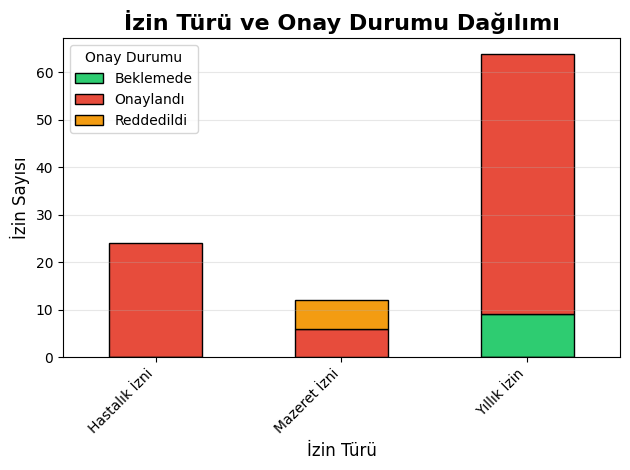


İzin İstatistikleri:
onay_durumu    Beklemede  Onaylandı  Reddedildi
izin_turu                                      
Hastalık İzni          0         24           0
Mazeret İzni           0          6           6
Yıllık İzin            9         55           0


In [7]:
# İzin türü ve onay durumu analizi
izin_analiz = izinler.groupby(['izin_turu', 'onay_durumu']).size().unstack(fill_value=0)

# Grafik
plt.figure(figsize=(10, 6))
izin_analiz.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c', '#f39c12'], edgecolor='black')
plt.title('İzin Türü ve Onay Durumu Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('İzin Türü', fontsize=12)
plt.ylabel('İzin Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Onay Durumu', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nİzin İstatistikleri:")
print(izin_analiz)